In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**There are null values present in 'bmi'.**

In [5]:
df_train.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df_train.bmi.replace(to_replace=np.nan, value=df_train.bmi.mean(), inplace=True)

In [7]:
df_train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df_train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


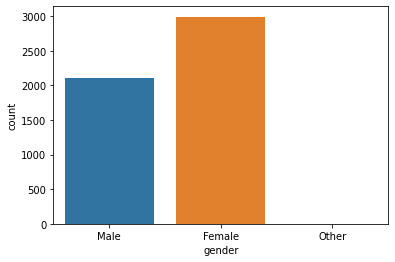

In [9]:
print(df_train.gender.value_counts())
plot = sns.countplot(data=df_train, x="gender")
plt.show()

0    4612
1     498
Name: hypertension, dtype: int64


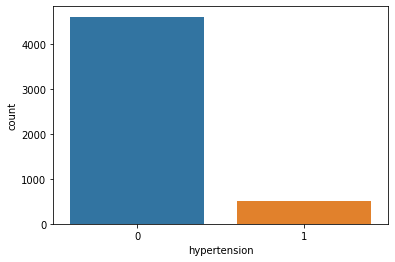

In [10]:
print(df_train.hypertension.value_counts())
plot = sns.countplot(data=df_train, x="hypertension")
plt.show()

Yes    3353
No     1757
Name: ever_married, dtype: int64


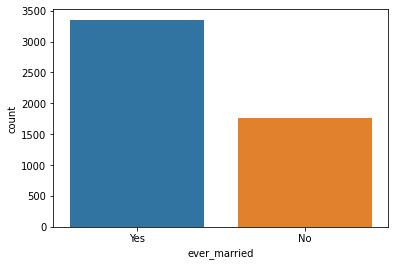

In [11]:
print(df_train.ever_married.value_counts())
ax = sns.countplot(data=df_train, x="ever_married")
plt.show()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


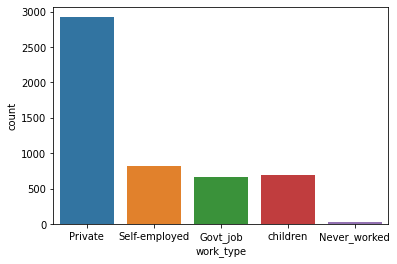

In [12]:
print(df_train.work_type.value_counts())
plot = sns.countplot(data=df_train, x="work_type")
plt.show()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


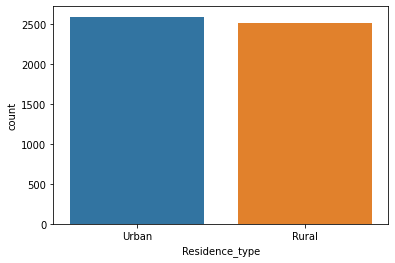

In [13]:
print(df_train.Residence_type.value_counts())
ax = sns.countplot(data=df_train, x="Residence_type")
plt.show()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


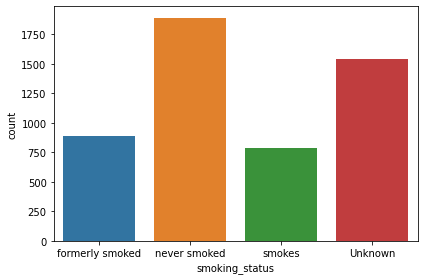

In [14]:
print(df_train.smoking_status.value_counts())
plot = sns.countplot(data=df_train, x="smoking_status")
plot.set_xticklabels(plot.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

0    4861
1     249
Name: stroke, dtype: int64


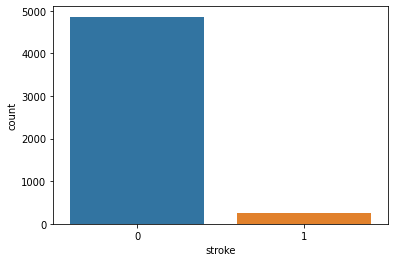

In [15]:
print(df_train.stroke.value_counts())
plot = sns.countplot(data=df_train, x="stroke")
plt.show()

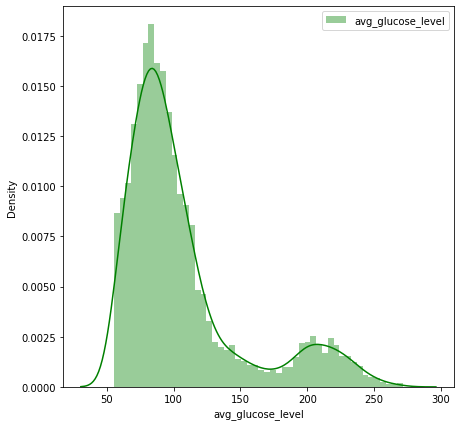

In [16]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df_train.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

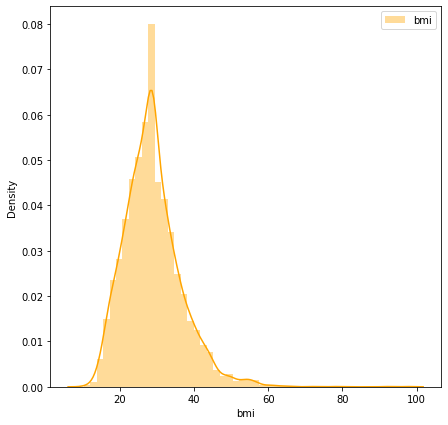

In [17]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df_train.bmi, color="orange", label="bmi", kde= True)
plt.legend()

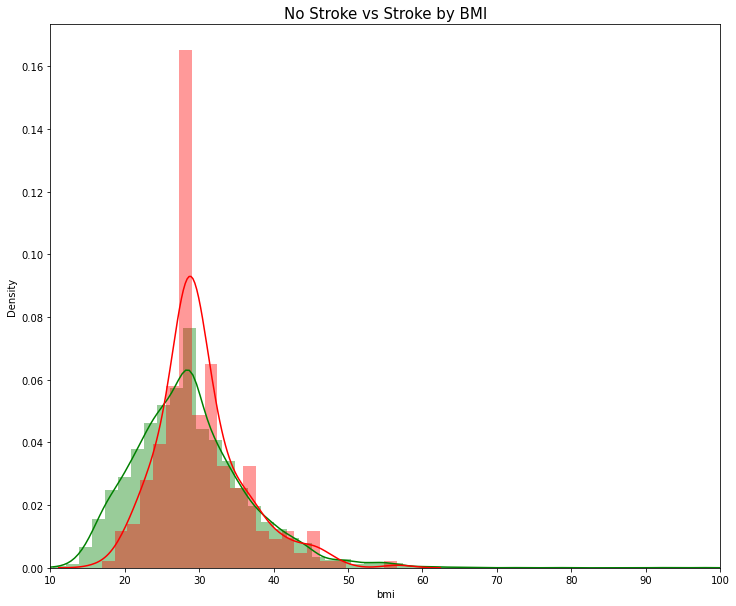

In [18]:
plt.figure(figsize=(12,10))

sns.distplot(df_train[df_train['stroke'] == 0]["bmi"], color='green') 
sns.distplot(df_train[df_train['stroke'] == 1]["bmi"], color='red') 

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

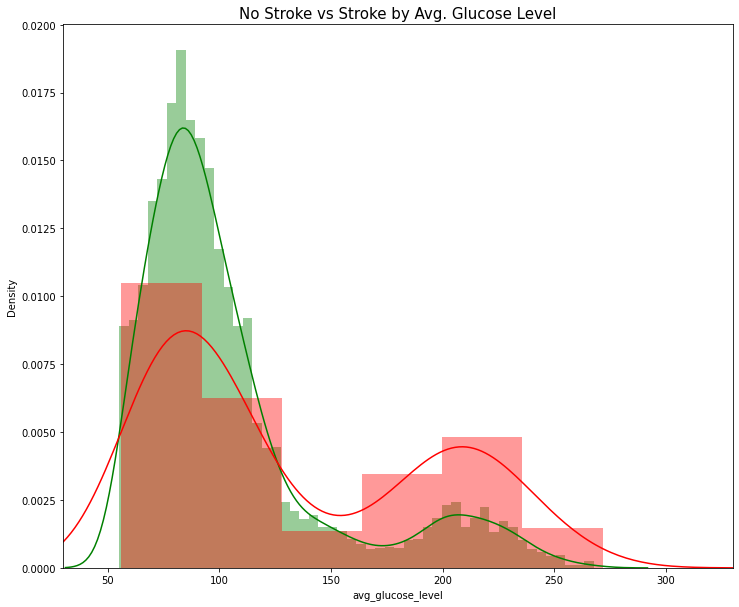

In [19]:
plt.figure(figsize=(12,10))

sns.distplot(df_train[df_train['stroke'] == 0]["avg_glucose_level"], color='green') 
sns.distplot(df_train[df_train['stroke'] == 1]["avg_glucose_level"], color='red') 

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

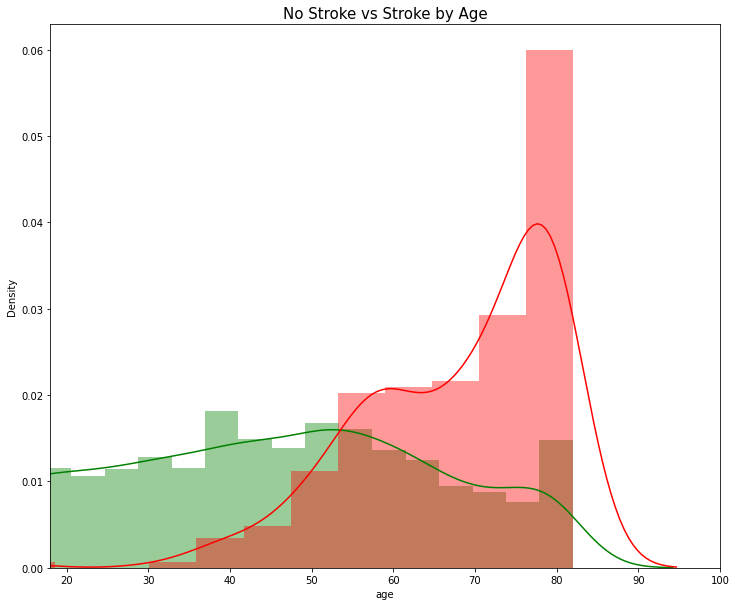

In [20]:
plt.figure(figsize=(12,10))

sns.distplot(df_train[df_train['stroke'] == 0]["age"], color='green') 
sns.distplot(df_train[df_train['stroke'] == 1]["age"], color='red') 

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

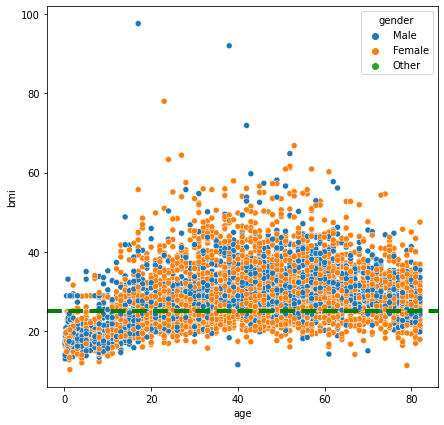

In [21]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df_train, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='g',linestyle= '--')
plt.show()

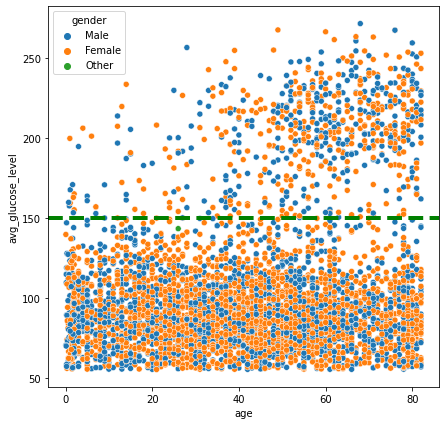

In [22]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df_train, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='g', linestyle= '--')
plt.show()

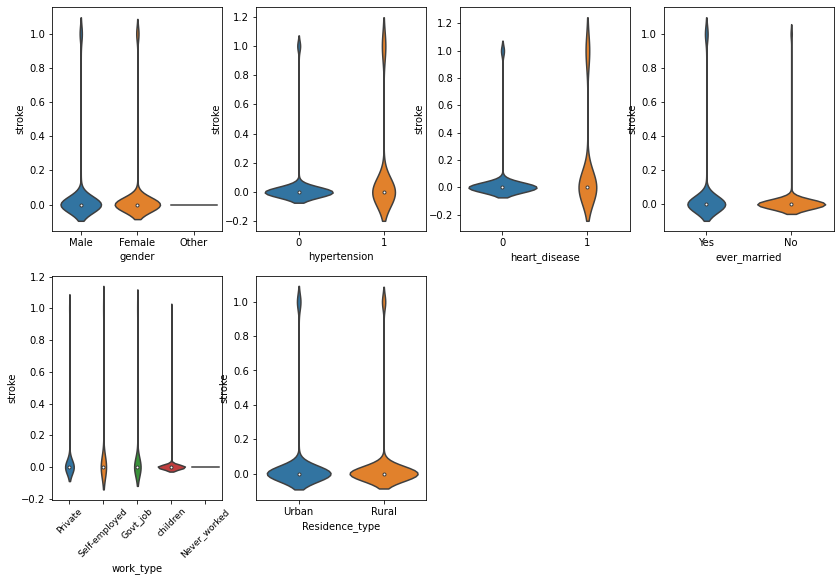

In [23]:
plt.figure(figsize=(14,14))
plt.subplot(3,4,1)
sns.violinplot(x = 'gender', y = 'stroke', data = df_train)
plt.subplot(3,4,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = df_train)
plt.subplot(3,4,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = df_train)
plt.subplot(3,4,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = df_train)
plt.subplot(3,4,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = df_train)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(3,4,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = df_train)
plt.show()

In [24]:
x = df_train.iloc[:, 1:-1].values
y = df_train.iloc[:, -1].values

In [25]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [26]:
le = LabelEncoder()
x[:, 15] = le.fit_transform(x[:, 15])
x[:, 16] = le.fit_transform(x[:, 16])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [28]:
print( x_train.shape)
print( y_train.shape)
print( x_test.shape)
print( y_test.shape)

(4088, 19)
(4088,)
(1022, 19)
(1022,)


In [29]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
print("Before OverSampling label '1': {}".format(sum(y_train==1)))
print("Before OverSampling label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling label '0': {}".format(sum(y_train_res==0)))

Before OverSampling label '1': 195
Before OverSampling label '0': 3893 

After OverSampling shape of train_X: (7786, 19)
After OverSampling shape of train_y: (7786,) 

After OverSampling label '1': 3893
After OverSampling label '0': 3893


In [31]:
LRmodel = LogisticRegression(solver='liblinear')
LRmodel.fit(x_test,y_test)
pred = LRmodel.predict(x_test)

In [32]:
print(' precision score: ',precision_score(y_test, pred,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, pred,average='micro'),'\n')
print(classification_report(y_test, pred))

 precision score:  0.9481409001956947 

 recall score:  0.9481409001956947 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022



In [33]:
print('Accuracy score (train set) = %0.4f'%accuracy_score(y_train, LRmodel.predict(x_train)))
print('Accuracy score (test set) = %0.4f'%accuracy_score(y_test, pred))

Accuracy score (train set) = 0.9511
Accuracy score (test set) = 0.9481


In [34]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))


strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores = []


for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train[train, :], y_train[train])
    score = pipeline.score(x_train[test, :], y_train[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [3503  176], Accuracy: 0.951
Fold:  2, Training/Test Split Distribution: [3503  176], Accuracy: 0.954
Fold:  3, Training/Test Split Distribution: [3503  176], Accuracy: 0.954
Fold:  4, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  5, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  6, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  7, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  8, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  9, Training/Test Split Distribution: [3504  176], Accuracy: 0.951
Fold: 10, Training/Test Split Distribution: [3504  176], Accuracy: 0.953


Cross-Validation accuracy: 0.952 +/- 0.001


In [35]:
RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=4) 
RFmodel.fit(x_train, y_train)
pred2 =  RFmodel.predict(x_test)

In [36]:
print(' precision score: ',precision_score(y_test, pred2,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, pred2,average='micro'),'\n')
print(classification_report(y_test, pred))

 precision score:  0.9471624266144814 

 recall score:  0.9471624266144814 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022



In [37]:
print('Accuracy score (train set) = %0.4f'%accuracy_score(y_train, RFmodel.predict(x_train)))
print('Accuracy score (test set) = %0.4f'%accuracy_score(y_test, pred2))

Accuracy score (train set) = 0.9523
Accuracy score (test set) = 0.9472


In [38]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='entropy',max_depth=4))


strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores = []


for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train[train, :], y_train[train])
    score = pipeline.score(x_train[test, :], y_train[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [3503  176], Accuracy: 0.954
Fold:  2, Training/Test Split Distribution: [3503  176], Accuracy: 0.954
Fold:  3, Training/Test Split Distribution: [3503  176], Accuracy: 0.954
Fold:  4, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  5, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  6, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  7, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  8, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  9, Training/Test Split Distribution: [3504  176], Accuracy: 0.953
Fold: 10, Training/Test Split Distribution: [3504  176], Accuracy: 0.953


Cross-Validation accuracy: 0.952 +/- 0.001


In [39]:
KNmodel = KNeighborsClassifier()
KNmodel.fit(x_train, y_train) 
pred3 =  KNmodel.predict(x_test)

In [41]:
print(' precision score: ',precision_score(y_test, pred3),'\n')
print(' recall score: ',recall_score(y_test, pred3),'\n')
print(classification_report(y_test, pred3))

 precision score:  0.3333333333333333 

 recall score:  0.018518518518518517 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.33      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022



In [42]:
print('Accuracy score (train set) = %0.4f'%accuracy_score(y_train, RFmodel.predict(x_train)))
print('Accuracy score (test set) = %0.4f'%accuracy_score(y_test, pred3))

Accuracy score (train set) = 0.9523
Accuracy score (test set) = 0.9462


In [43]:
pipeline = make_pipeline(StandardScaler(),KNeighborsClassifier() )


strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores = []


for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train[train, :], y_train[train])
    score = pipeline.score(x_train[test, :], y_train[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [3503  176], Accuracy: 0.949
Fold:  2, Training/Test Split Distribution: [3503  176], Accuracy: 0.946
Fold:  3, Training/Test Split Distribution: [3503  176], Accuracy: 0.954
Fold:  4, Training/Test Split Distribution: [3504  175], Accuracy: 0.949
Fold:  5, Training/Test Split Distribution: [3504  175], Accuracy: 0.946
Fold:  6, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  7, Training/Test Split Distribution: [3504  175], Accuracy: 0.946
Fold:  8, Training/Test Split Distribution: [3504  175], Accuracy: 0.954
Fold:  9, Training/Test Split Distribution: [3504  176], Accuracy: 0.944
Fold: 10, Training/Test Split Distribution: [3504  176], Accuracy: 0.953


Cross-Validation accuracy: 0.949 +/- 0.003


In [44]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train, y_train)
pred4 = xgb_cl.predict(x_test)


In [46]:
print(' precision score: ',precision_score(y_test, pred4,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, pred4,average='micro'),'\n')
print(classification_report(y_test, pred4))

 precision score:  0.9432485322896281 

 recall score:  0.9432485322896281 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.25      0.04      0.06        54

    accuracy                           0.94      1022
   macro avg       0.60      0.52      0.52      1022
weighted avg       0.91      0.94      0.92      1022



In [47]:
print('Accuracy score (train set) = %0.4f'%accuracy_score(y_train, xgb_cl.predict(x_train)))
print('Accuracy score (test set) = %0.4f'%accuracy_score(y_test, pred4))

Accuracy score (train set) = 0.9958
Accuracy score (test set) = 0.9432


In [48]:
pipeline = make_pipeline(StandardScaler(),KNeighborsClassifier() )


strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores = []


for k, (train, test) in enumerate(kfold):
    pipeline.fit(x_train[train, :], y_train[train])
    score = pipeline.score(x_train[test, :], y_train[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [3503  176], Accuracy: 0.949
Fold:  2, Training/Test Split Distribution: [3503  176], Accuracy: 0.946
Fold:  3, Training/Test Split Distribution: [3503  176], Accuracy: 0.954
Fold:  4, Training/Test Split Distribution: [3504  175], Accuracy: 0.949
Fold:  5, Training/Test Split Distribution: [3504  175], Accuracy: 0.946
Fold:  6, Training/Test Split Distribution: [3504  175], Accuracy: 0.951
Fold:  7, Training/Test Split Distribution: [3504  175], Accuracy: 0.946
Fold:  8, Training/Test Split Distribution: [3504  175], Accuracy: 0.954
Fold:  9, Training/Test Split Distribution: [3504  176], Accuracy: 0.944
Fold: 10, Training/Test Split Distribution: [3504  176], Accuracy: 0.953


Cross-Validation accuracy: 0.949 +/- 0.003
